### 準備

このプログラムではグラフ表示のために **graphviz** というツールを使っていますので、実行に先立って graphviz を使えるようにするための作業が必要です。その内容は、「[Windows10 で Graphviz を使うための設定](http://localhost:8888/notebooks/ML02%20%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%81%AE%E5%AD%A6%E7%BF%92/Windows10%20%E3%81%A6%E3%82%99%20Graphviz%20%E3%82%92%E4%BD%BF%E3%81%86%E3%81%9F%E3%82%81%E3%81%AE%E8%A8%AD%E5%AE%9A.ipynb)」に書いてありますので、先にそちらを済ませて下さい。


In [1]:
# !pip install graphviz  
# !pip install pydotplus 

In [11]:
# モジュールのインポート
import pandas as pd
from sklearn import tree
from sklearn.externals.six import StringIO
from graphviz import Digraph
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from  PIL import Image,ImageDraw,ImageFont
import numpy as np
from IPython.display import display

#FONTPATH = "C:\\Windows\\Fonts\HGRSMP.TTF"  # for Windows
#FONTPATH = '/Library/Fonts/SFNSText.ttf'  # for Macintosh

# 識別対象データ
顔の構成部品のある無しのみのリストを対象データとする

In [2]:
faces=np.array([
    # 9 つの成分の意味
    # 第0成分: 住居形態　　０:マンション、1:一戸建て
    # 第1成分: 家族構成 0:独身、1:小家族、2:大家族
    # 第2成分: 収入　　０:低収入、1:高収入
    # 第3成分: ローン残高　0:なし、1:あり
    # 第4成分: 販売実績　　0:なし、1:あり
    [0,0,0,0,"なし"],
    [1,2,1,0,"なし"],
    [0,2,1,1,"あり"],
    [0,1,1,1,"あり"],
    [1,1,0,0,"なし"],
    [0,0,1,0,"なし"],
    [0,2,0,1,"なし"],
    [1,2,1,1,"あり"]
    ])

items1=['住居形態','家族構成','収入','ローン残高']
items2=['販売実績','判定結果']
dummy=np.array([None]*8)
fd = pd.DataFrame(np.c_[faces,dummy],columns=np.r_[items1,items2])
fd

,住居形態,家族構成,収入,ローン残高,販売実績,判定結果
0,0,0,0,0,なし,None
1,1,2,1,0,なし,None
2,0,2,1,1,あり,None
3,0,1,1,1,あり,None
4,1,1,0,0,なし,None
5,0,0,1,0,なし,None
6,0,2,0,1,なし,None
7,1,2,1,1,あり,None


# 決定木の生成プログラム

# 決定木の準備

In [3]:
classifier = tree.DecisionTreeClassifier(criterion='entropy') # default の criterion は gini

# 訓練データをもとに決定木を構成する


In [4]:
classifier.fit(fd[items1],fd['販売実績']);

# 完成した決定木をpng画像として出力

In [5]:
dot_data = StringIO() # 仮想テキストファイル
tree.export_graphviz(classifier, out_file=dot_data) # 決定木の描画用データ dot_data を生成する
# tree.export_graphviz(classifier, out_file="dot_data.dot") # 決定木の描画用データ dot_data を生成する
dot_text = dot_data.getvalue() # dot_data を文字列として取り出し， X[_] を表見出しに使っている言葉で置換

In [6]:
# dot_text

In [7]:
for i in range(len(items1)):
    dot_text = dot_text.replace('X[{}]'.format(i),items1[i])
dot_text

'digraph Tree {\nnode [shape=box] ;\n0 [label="ローン残高 <= 0.5\\nentropy = 0.954\\nsamples = 8\\nvalue = [3, 5]"] ;\n1 [label="entropy = 0.0\\nsamples = 4\\nvalue = [0, 4]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="収入 <= 0.5\\nentropy = 0.811\\nsamples = 4\\nvalue = [3, 1]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n2 -> 4 ;\n}'

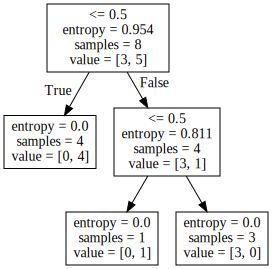

In [8]:
from graphviz import Source
src = Source(dot_text)
src.format="png"
src.render("juutaku.png")
src

# 決定木を png ファイルとして出力
```
graph = pydotplus.graph_from_dot_data(dot_text)
for node in graph.get_nodes():
    node.set_fontname("Meiryo")
graph.write_png('facedetectTree.png');  #png 画像として書き出し
# Image.open('facedetectTree.png')  # 即表示して確認したけばコメントをはずす
```

# 全判定結果

In [9]:
fd['判定結果']=classifier.predict(fd[items1])
fd

,住居形態,家族構成,収入,ローン残高,販売実績,判定結果
0,0,0,0,0,なし,なし
1,1,2,1,0,なし,なし
2,0,2,1,1,あり,あり
3,0,1,1,1,あり,あり
4,1,1,0,0,なし,なし
5,0,0,1,0,なし,なし
6,0,2,0,1,なし,なし
7,1,2,1,1,あり,あり


In [10]:
print("正解率 {:3.2f}　％".format((fd['販売実績'] != fd['判定結果']).value_counts()[False]*100/8))

正解率 100.00　％
